In [1]:
import numpy as np

In [5]:
!cat 2D_example.csv

1,-7.428476,1.509903
0,2.980693,1.960821
0,3.988255,4.636389
1,-5.789437,-4.621614
1,-4.894447,-3.269730
1,-1.933949,-0.047276
0,-1.611771,5.932201
1,-6.670152,-1.036282
1,-2.931415,-0.104475
0,-0.074762,1.070002
1,-2.691793,4.168774
0,0.461182,3.453438
0,-1.354135,3.751657
1,-6.229476,-1.209434
0,2.778594,7.582103
1,-5.719578,-0.243509
0,0.928322,3.208520
0,0.850475,2.908955
1,-6.029489,-1.831199
0,1.116025,3.353602


In [6]:
#dataのにデータをセット
data = np.loadtxt("2D_example.csv",delimiter=",")

In [7]:
#一列目がラベル　整数に変換
y=data[:,0].astype(int)
#: 上から下まで全部
#0 一番左の列
#intでyに入れる

In [8]:
y

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0])

In [9]:
X=data[:,1:3] #2,3列目をxに入れる

In [10]:
X

array([[-7.428476,  1.509903],
       [ 2.980693,  1.960821],
       [ 3.988255,  4.636389],
       [-5.789437, -4.621614],
       [-4.894447, -3.26973 ],
       [-1.933949, -0.047276],
       [-1.611771,  5.932201],
       [-6.670152, -1.036282],
       [-2.931415, -0.104475],
       [-0.074762,  1.070002],
       [-2.691793,  4.168774],
       [ 0.461182,  3.453438],
       [-1.354135,  3.751657],
       [-6.229476, -1.209434],
       [ 2.778594,  7.582103],
       [-5.719578, -0.243509],
       [ 0.928322,  3.20852 ],
       [ 0.850475,  2.908955],
       [-6.029489, -1.831199],
       [ 1.116025,  3.353602]])

In [11]:
X[:,0] # xの一列目 csvの二列目

array([-7.428476,  2.980693,  3.988255, -5.789437, -4.894447, -1.933949,
       -1.611771, -6.670152, -2.931415, -0.074762, -2.691793,  0.461182,
       -1.354135, -6.229476,  2.778594, -5.719578,  0.928322,  0.850475,
       -6.029489,  1.116025])

In [12]:
X[:,1] # xの二列目 csvの三列目

array([ 1.509903,  1.960821,  4.636389, -4.621614, -3.26973 , -0.047276,
        5.932201, -1.036282, -0.104475,  1.070002,  4.168774,  3.453438,
        3.751657, -1.209434,  7.582103, -0.243509,  3.20852 ,  2.908955,
       -1.831199,  3.353602])

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.set_cmap(plt.cm.Paired) #色設定


<Figure size 432x288 with 0 Axes>

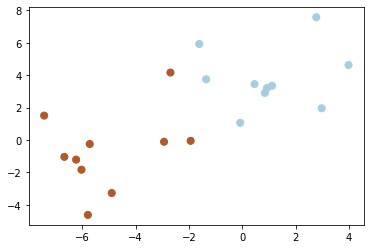

In [15]:
plt.scatter(X[:,0],X[:,1],c=y,s=50)
# scatterスキャッター　二次元散布図　cカラー　sサイズ

In [16]:
# 境界線を引く関数の定義

def plotBoundary(X, clf, mesh=True, boundary=True, n_neighbors=1):

    # plot range
    x_min = min(X[:,0])
    x_max = max(X[:,0])
    y_min = min(X[:,1])
    y_max = max(X[:,1])

    # visualizing decision function
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # make a grid
    
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()]) # evaluate the value 
    
    Z = Z.reshape(XX.shape) # just reshape

    if mesh:
        plt.pcolormesh(XX, YY, Z, zorder=-10) # paint in 2 colors, if Z > 0 or not

    if boundary:
        plt.contour(XX, YY, Z, 
                    colors='k', linestyles='-', levels=[0.5])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

In [17]:
from sklearn import neighbors #ニヤレストネイバーズ K−近傍法 通称 K-NN（K-Nearest Neighbor Algorithm の略称）
clf = neighbors.KNeighborsClassifier(n_neighbors=1)  #オブジェクトの作成

<ipython-input-16-e0565c65ff19>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z, zorder=-10) # paint in 2 colors, if Z > 0 or not


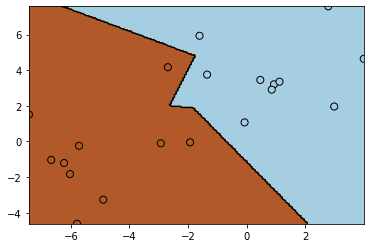

In [18]:
clf.fit(X,y) # 学習
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')
plotBoundary(X,clf) #境界線の描画

In [19]:
from sklearn import linear_model
#オブジェクトの作成 線形回帰モデル (Linear Regression) 
clf = linear_model.LogisticRegression()

<ipython-input-16-e0565c65ff19>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z, zorder=-10) # paint in 2 colors, if Z > 0 or not


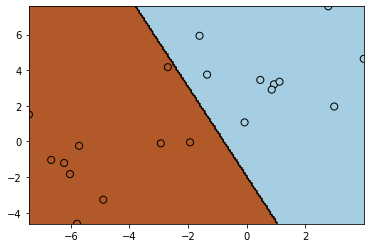

In [20]:
clf.fit(X,y) # 学習
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')
plotBoundary(X,clf) #境界線の描画

In [21]:
from sklearn import svm
clf=svm.SVC(kernel='linear') #SVM（サポートベクターマシン）とは、データを分類して境界線を引くためのアルゴリズムです。

<ipython-input-16-e0565c65ff19>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z, zorder=-10) # paint in 2 colors, if Z > 0 or not


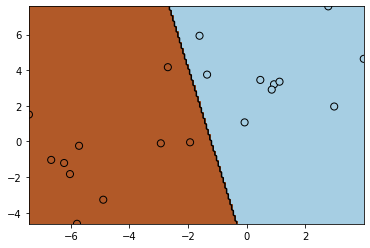

In [22]:
clf.fit(X,y) # 学習
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')
plotBoundary(X,clf) #境界線の描画

In [23]:
from sklearn import svm
clf=svm.SVC(kernel='rbf')
#RBFカーネル(Radial basis function kernel) RBFカーネルはカーネル関数の一つで、機械学習の文脈では、サポートベクターマシン(SVM)など内積のみを扱う線形のアルゴリズムを非線形化する際に登場します

<ipython-input-16-e0565c65ff19>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z, zorder=-10) # paint in 2 colors, if Z > 0 or not


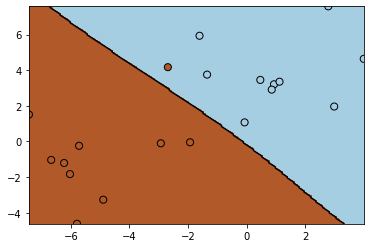

In [24]:
clf.fit(X,y) # 学習
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')
plotBoundary(X,clf) #境界線の描画

In [24]:
#
